Demonstrates that ESA CCI Sea Surface Temperature (SST) L4 data is wrongly interpreted by xarray in two ways:
1. The time is ``1947-05-12T09:58:14`` instead of ``2010-01-01T12:00:00``
2. The SST values are roughly ``-50`` to ``600`` Kelvin instead of ``270`` to ``310`` Kelvin.

Test data: ftp://anon-ftp.ceda.ac.uk/neodc/esacci/sst/data/lt/Analysis/L4/v01.1/2010/01/01/20100101120000-ESACCI-L4_GHRSST-SSTdepth-OSTIA-GLOB_LT-v02.0-fv01.1.nc

In [16]:
%matplotlib inline
import xarray as xr
import xarray.plot as plot

file = '20100101120000-ESACCI-L4_GHRSST-SSTdepth-OSTIA-GLOB_LT-v02.0-fv01.1.nc'
ds = xr.open_dataset(file, decode_cf=False)

im = ds.analysed_sst.sel(time=slice(None, None))

# Remove attributes to make it easier to read output
ds.attrs = {}
im.attrs = {}

In [17]:
ds

<xarray.Dataset>
Dimensions:                 (bnds: 2, lat: 3600, lon: 7200, time: 1)
Coordinates:
  * time                    (time) int32 -1061647306
  * lat                     (lat) float32 -89.975 -89.925 -89.875 -89.825 ...
  * lon                     (lon) float32 -179.975 -179.925 -179.875 ...
  * bnds                    (bnds) int64 0 1
Data variables:
    time_bnds               (time, bnds) float32 9.15149e+08 9.15235e+08
    lat_bnds                (lat, bnds) float32 -90.0 -89.95 -89.95 -89.9 ...
    lon_bnds                (lon, bnds) float32 -180.0 -179.95 -179.95 ...
    analysed_sst            (time, lat, lon) int16 128 128 128 128 128 128 ...
    analysis_error          (time, lat, lon) int16 128 128 128 128 128 128 ...
    sea_ice_fraction        (time, lat, lon) int8 -128 -128 -128 -128 -128 ...
    sea_ice_fraction_error  (time, lat, lon) int8 -128 -128 -128 -128 -128 ...
    mask                    (time, lat, lon) int8 2 2 2 2 2 2 2 2 2 2 2 2 2 ...

In [18]:
im

<xarray.DataArray 'analysed_sst' (time: 1, lat: 3600, lon: 7200)>
[25920000 values with dtype=int16]
Coordinates:
  * time     (time) int32 -1061647306
  * lat      (lat) float32 -89.975 -89.925 -89.875 -89.825 -89.775 -89.725 ...
  * lon      (lon) float32 -179.975 -179.925 -179.875 -179.825 -179.775 ...

In [19]:
im.min(), im.max()

(<xarray.DataArray 'analysed_sst' ()>
 array(-32768, dtype=int16), <xarray.DataArray 'analysed_sst' ()>
 array(32767, dtype=int16))

From the image below, we can see that the raw values seem to under or overflow (signed/unsigned short misinterpretation?)

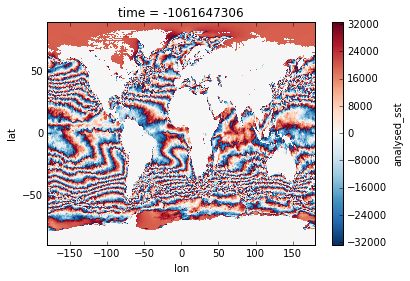

In [20]:
plot.imshow(im.isel(time=0))

In [21]:
im2 = im.clip(min=-300, max=4500)

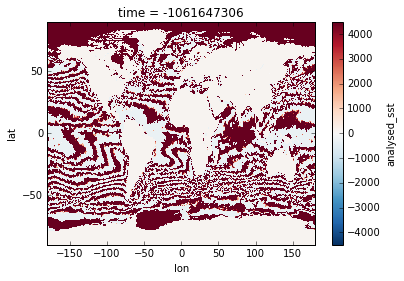

In [22]:
plot.imshow(im2.isel(time=0))

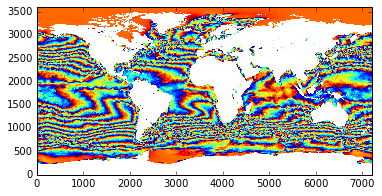

In [26]:
import netCDF4
import matplotlib.pyplot as plt
d = netCDF4.Dataset(file)
v = d['analysed_sst']
#v.set_auto_maskandscale(False)
plt.imshow(v[0, ...], origin='lower')
plt.show()

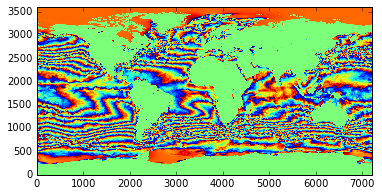

In [27]:
v = d['analysed_sst']
v.set_auto_maskandscale(False)
plt.imshow(v[0, ...], origin='lower')
plt.show()